In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, skew, kurtosis
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# --- STEP 1: Generate the Time Series ---
# We are creating a **stationary Gaussian time series**,
# which by definition satisfies both weak and strict stationarity.
# Parameters:
# - Mean (µ): 0
# - Variance (σ²): 1

np.random.seed(42)  # Seed ensures results are reproducible
n = 1000  # Number of time points
mu = 0    # Mean of the distribution
sigma = 1 # Standard deviation of the distribution
time_series = np.random.normal(mu, sigma, n)








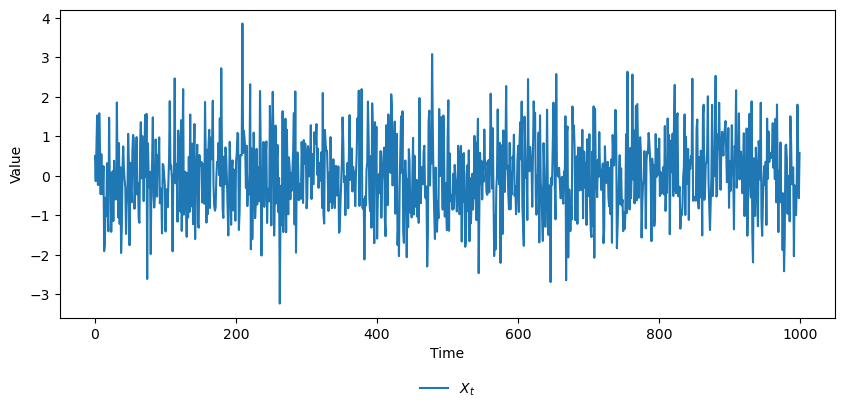

In [3]:
# --- STEP 2: Weak Stationarity ---
# A time series is **weakly stationary** if:
# 1. The mean (E[X_t]) is constant across time.
# 2. The variance (Var(X_t)) is constant across time.
# 3. The autocovariance (Cov(X_t, X_{t+h})) depends only on the lag h, not on time t.

# --- 2.1: Visual Inspection ---
# Plot the time series to observe whether it shows any trend or changing variance.
plt.figure(figsize=(10, 4))
plt.plot(time_series, label="$X_t$")
#plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=1,framealpha=0)
plt.savefig("ATSSB_Stationarity_TS.png", transparent=True, bbox_inches="tight")
plt.show()


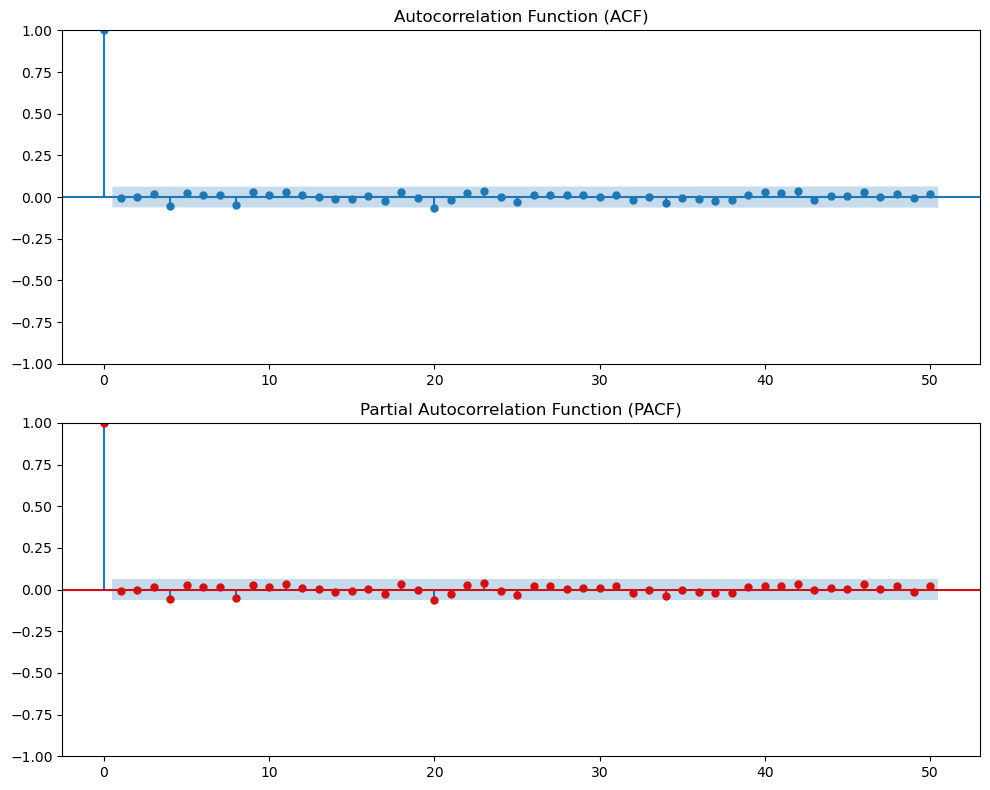

In [4]:
# --- 2.2: ACF and PACF ---
# ACF: Measures the correlation of a time series with its lagged versions.
# PACF: Measures the direct influence of a lag, removing intermediate effects.
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(time_series, lags=50, ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")
sm.graphics.tsa.plot_pacf(time_series, lags=50, ax=ax[1], method="ywm", color="#D30F11")
ax[1].set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.savefig("ATSSB_Stationarity_acf_pacf_plot.png", transparent=True, bbox_inches="tight")
plt.show()

In [5]:

# --- 2.3: Augmented Dickey-Fuller (ADF) Test ---
# The ADF test examines whether a unit root is present in the series.
# Formula for ADF statistic:
#   ADF = [(Y_t - α - β * t)^2] / Variance of residuals
# Hypotheses:
# - Null Hypothesis (H₀): The series is non-stationary (contains a unit root).
# - Alternative Hypothesis (H₁): The series is stationary.

adf_test = adfuller(time_series)
print("\nAugmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]:.3f}")
print(f"p-value: {adf_test[1]:.3f}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"  {key}: {value:.3f}")

if adf_test[1] < 0.05:
    print("The time series is stationary (reject H₀).")
else:
    print("The time series is not stationary (fail to reject H₀).")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -31.811
p-value: 0.000
Critical Values:
  1%: -3.437
  5%: -2.864
  10%: -2.568
The time series is stationary (reject H₀).


In [6]:

# --- STEP 3: Strict Stationarity ---
# Strict stationarity requires the **joint distribution** of (X_t, X_{t+h}) to be invariant over time.
# We test for strict stationarity by:
# 1. Comparing distributions of random splits of the time series using:
#    - Kolmogorov-Smirnov (KS) Test: Compares cumulative distributions.
#    - Higher-order moments (mean, variance, skewness, kurtosis).
# 2. Calculating empirical p-values from multiple random splits.

# Function to split the time series randomly
def random_split(time_series, split_ratio=0.5):
    """
    Splits the time series into two random subsets.
    """
    indices = np.random.permutation(len(time_series))  # Shuffle indices
    split_point = int(len(time_series) * split_ratio)  # Split point
    subset1 = time_series[indices[:split_point]]  # First subset
    subset2 = time_series[indices[split_point:]]  # Second subset
    return subset1, subset2

# Perform 1000 random splits to calculate empirical distributions of test statistics
num_iterations = 1000  # Number of random splits
ks_stats = []          # Kolmogorov-Smirnov statistics
mean_diffs = []        # Differences in means
variance_diffs = []    # Differences in variances
skewness_diffs = []    # Differences in skewness
kurtosis_diffs = []    # Differences in kurtosis

for _ in range(num_iterations):
    subset1, subset2 = random_split(time_series)
    
    # Kolmogorov-Smirnov Test: Compare cumulative distributions
    ks_stat, _ = ks_2samp(subset1, subset2)
    ks_stats.append(ks_stat)
    
    # Calculate differences in moments
    mean_diffs.append(np.abs(np.mean(subset1) - np.mean(subset2)))
    variance_diffs.append(np.abs(np.var(subset1) - np.var(subset2)))
    skewness_diffs.append(np.abs(skew(subset1) - skew(subset2)))
    kurtosis_diffs.append(np.abs(kurtosis(subset1) - kurtosis(subset2)))

# Observed values for a single random split
subset1, subset2 = random_split(time_series)
obs_ks_stat, _ = ks_2samp(subset1, subset2)
obs_mean_diff = np.abs(np.mean(subset1) - np.mean(subset2))
obs_variance_diff = np.abs(np.var(subset1) - np.var(subset2))
obs_skewness_diff = np.abs(skew(subset1) - skew(subset2))
obs_kurtosis_diff = np.abs(kurtosis(subset1) - kurtosis(subset2))

# Empirical p-values
empirical_p_ks = np.mean([stat >= obs_ks_stat for stat in ks_stats])
empirical_p_mean = np.mean([diff >= obs_mean_diff for diff in mean_diffs])
empirical_p_variance = np.mean([diff >= obs_variance_diff for diff in variance_diffs])
empirical_p_skewness = np.mean([diff >= obs_skewness_diff for diff in skewness_diffs])
empirical_p_kurtosis = np.mean([diff >= obs_kurtosis_diff for diff in kurtosis_diffs])

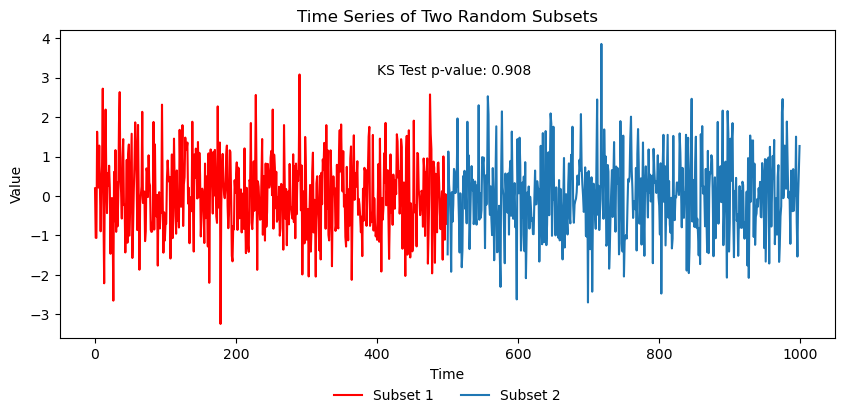

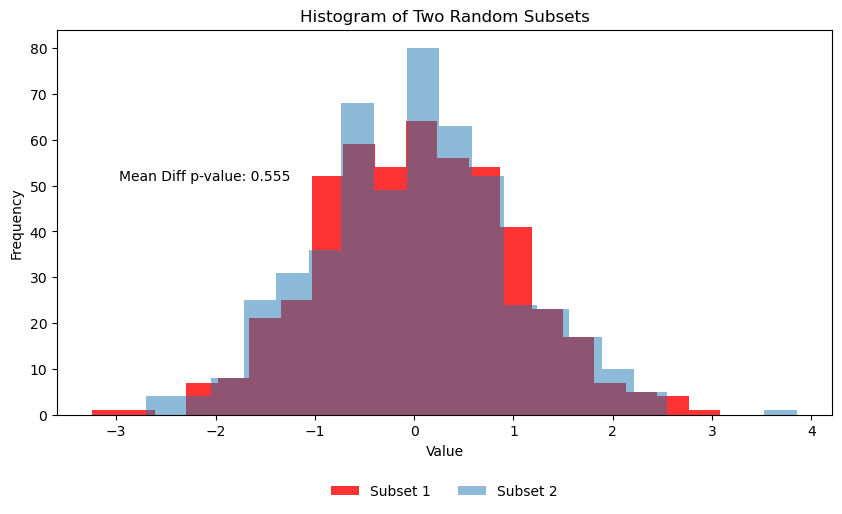

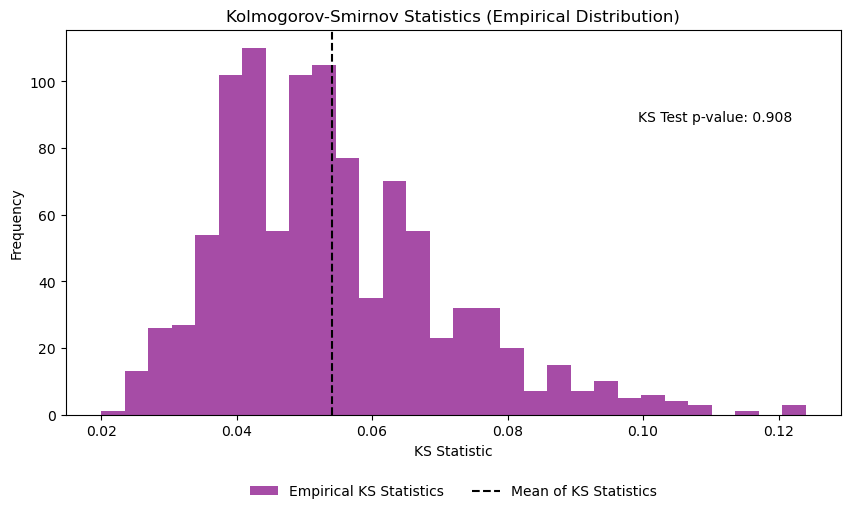

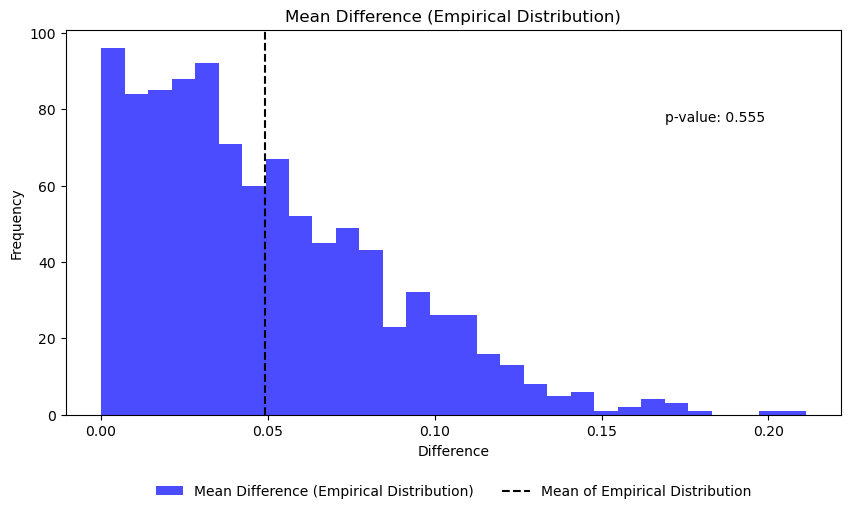

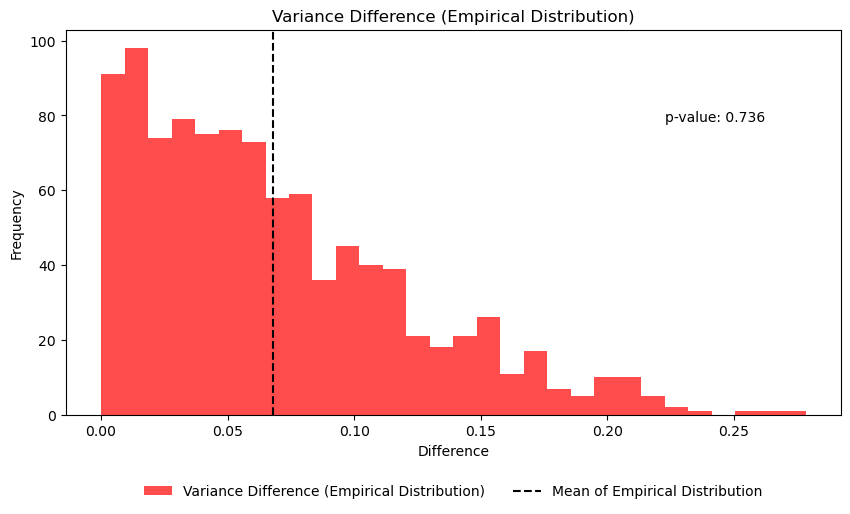

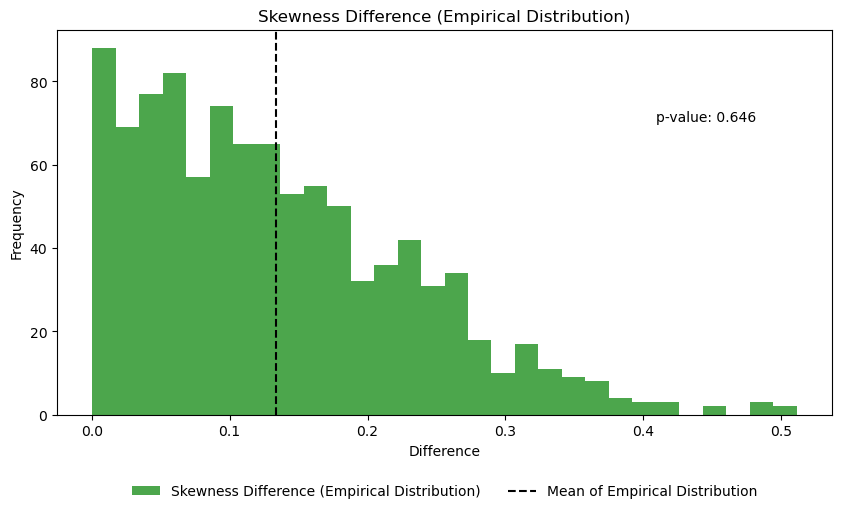

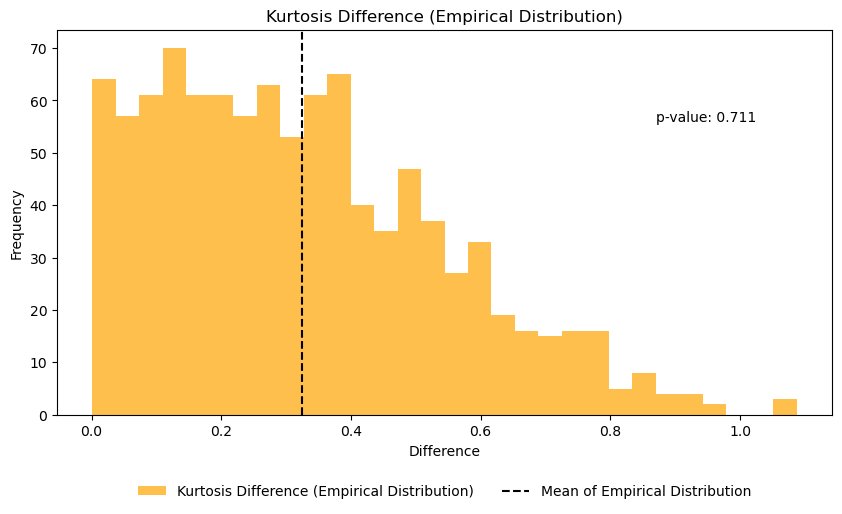

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 4: Visualization ---

# Time Series Plots for Subset 1 and Subset 2
plt.figure(figsize=(10, 4))
plt.plot(subset1, color="red", label="Subset 1")
plt.plot(range(len(subset1), len(subset1) + len(subset2)), subset2,label="Subset 2")
plt.title("Time Series of Two Random Subsets")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
plt.text(len(subset1) * 0.8, max(max(subset1), max(subset2)) * 0.8,  # P-value inside chart
         f'KS Test p-value: {empirical_p_ks:.3f}', fontsize=10, color='black')
plt.savefig("time_series_random_subsets.png", transparent=True, bbox_inches="tight")
plt.show()

# Histogram for Subset 1 and Subset 2
plt.figure(figsize=(10, 5))
plt.hist(subset1, bins=20, alpha=0.8, color="red", label="Subset 1")
plt.hist(subset2, bins=20, alpha=0.5, label="Subset 2")
plt.title("Histogram of Two Random Subsets")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
plt.text(np.mean([np.min(subset1), np.min(subset2)]), 
         0.8 * max(np.histogram(subset1, bins=20)[0]),  # P-value inside chart
         f'Mean Diff p-value: {empirical_p_mean:.3f}', fontsize=10, color='black')
plt.savefig("histogram_random_subsets.png", transparent=True, bbox_inches="tight")
plt.show()

# Kolmogorov-Smirnov Statistic Distribution
plt.figure(figsize=(10, 5))
plt.hist(ks_stats, bins=30, alpha=0.7, color="purple", label="Empirical KS Statistics")
plt.axvline(np.mean(ks_stats), color="black", linestyle="--", label="Mean of KS Statistics")
plt.title("Kolmogorov-Smirnov Statistics (Empirical Distribution)")
plt.xlabel("KS Statistic")
plt.ylabel("Frequency")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
plt.text(0.8 * np.max(ks_stats), 
         0.8 * max(np.histogram(ks_stats, bins=30)[0]),  # P-value inside chart
         f'KS Test p-value: {empirical_p_ks:.3f}', fontsize=10, color='black')
plt.savefig("ks_stat_distribution_with_mean.png", transparent=True, bbox_inches="tight")
plt.show()

# Moment Difference Distributions
moment_labels = [
    "Mean Difference (Empirical Distribution)",
    "Variance Difference (Empirical Distribution)",
    "Skewness Difference (Empirical Distribution)",
    "Kurtosis Difference (Empirical Distribution)"
]
moment_values = [mean_diffs, variance_diffs, skewness_diffs, kurtosis_diffs]
empirical_means = [np.mean(mean_diffs), np.mean(variance_diffs), np.mean(skewness_diffs), np.mean(kurtosis_diffs)]
empirical_p_values = [empirical_p_mean, empirical_p_variance, empirical_p_skewness, empirical_p_kurtosis]
colors = ["blue", "red", "green", "orange"]

for label, values, mean_value, p_value, color in zip(moment_labels, moment_values, empirical_means, empirical_p_values, colors):
    plt.figure(figsize=(10, 5))
    plt.hist(values, bins=30, alpha=0.7, color=color, label=f"{label}")
    plt.axvline(mean_value, color="black", linestyle="--", label="Mean of Empirical Distribution")
    plt.title(label)
    plt.xlabel("Difference")
    plt.ylabel("Frequency")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
    plt.text(0.8 * np.max(values), 
             0.8 * max(np.histogram(values, bins=30)[0]),  # P-value inside chart
             f'p-value: {p_value:.3f}', fontsize=10, color='black')
    plt.savefig(f"{label.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_with_mean.png", 
                transparent=True, bbox_inches="tight")
    plt.show()


Empirical Mean of KS Statistics: 0.054
Empirical Variance of KS Statistics: 0.000
Test Statistic (Sequential Subsets): 0.036
p-value: 0.908


/var/folders/pk/sxdc5n5x6mb322grbvxz_nm40000gp/T/ipykernel_21890/2055093082.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)


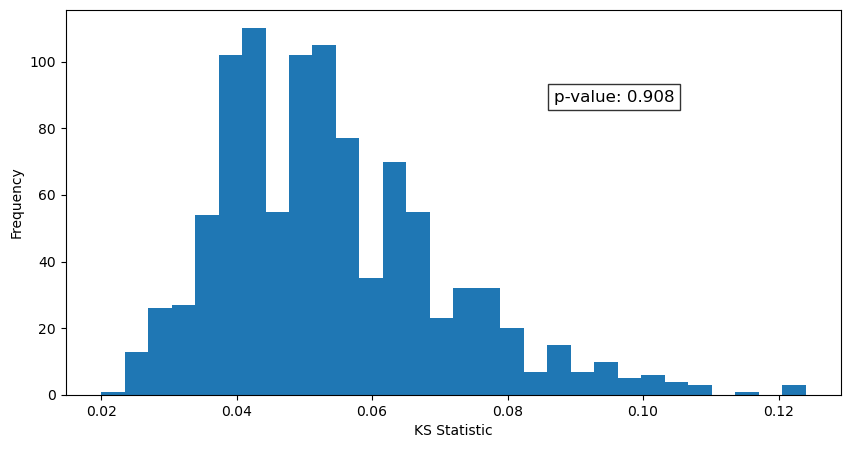

In [36]:
import numpy as np
from scipy.stats import ks_2samp, skew, kurtosis
import matplotlib.pyplot as plt

# Simulated stationary time series
np.random.seed(42)
time_series = np.random.normal(0, 1, 1000)

# Function to split time series
def random_split(data, split_ratio=0.5):
    indices = np.random.permutation(len(data))
    split_point = int(len(data) * split_ratio)
    return data[indices[:split_point]], data[indices[split_point:]]

# Step 1: Generate empirical distribution from random splits
num_iterations = 1000
ks_stats = []  # Store K-S statistics

for _ in range(num_iterations):
    subset1, subset2 = random_split(time_series)
    ks_stat, _ = ks_2samp(subset1, subset2)
    ks_stats.append(ks_stat)

# Step 2: Calculate aggregate statistics for empirical distribution
empirical_mean = np.mean(ks_stats)  # Mean of the empirical distribution
empirical_var = np.var(ks_stats)   # Variance of the empirical distribution

# Step 3: Test the unshuffled subsets
subset1, subset2 = time_series[:500], time_series[500:]
test_stat, _ = ks_2samp(subset1, subset2)

# Step 4: Compute the p-value
p_value = np.mean([stat >= test_stat for stat in ks_stats])

# Output results
print(f"Empirical Mean of KS Statistics: {empirical_mean:.3f}")
print(f"Empirical Variance of KS Statistics: {empirical_var:.3f}")
print(f"Test Statistic (Sequential Subsets): {test_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.hist(ks_stats, bins=30, alpha=0.7, color="purple")
#plt.axvline(test_stat, color="red", linestyle="--", label="Test Statistic")
#plt.title("Kolmogorov-Smirnov Statistics (Empirical Distribution)")
plt.xlabel("KS Statistic")
plt.ylabel("Frequency")

# Display p-value on chart
plt.text(0.7 * max(ks_stats), 0.8 * max(plt.hist(ks_stats, bins=30)[0]), 
         f'p-value: {p_value:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
plt.savefig("ATSSB_Stationarity_ks_stat_distribution.png", transparent=True, bbox_inches="tight")
plt.show()

<h1>Examples</h1>

<h2>Weak Stationary Time Series - Log Returns</h2>
<p>While the returns of a stock are not stationary, usually the log returns are.</p>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


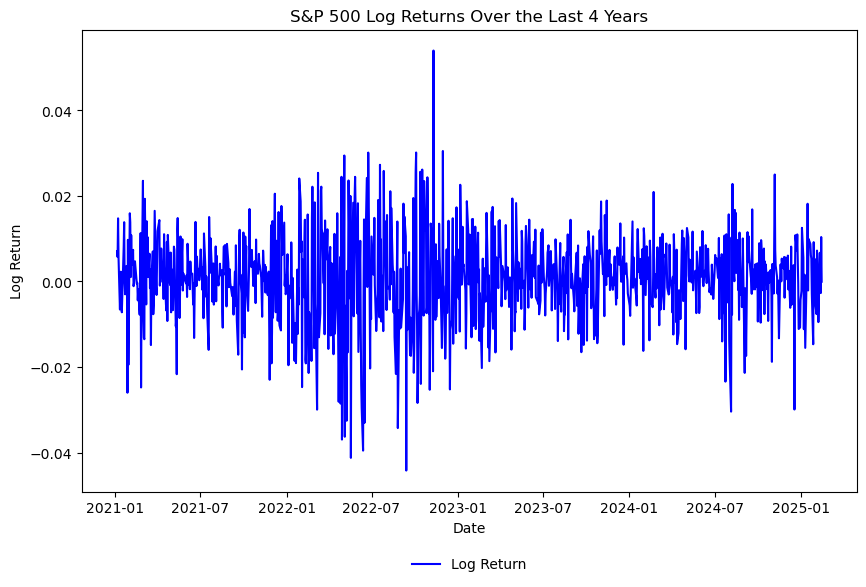

In [11]:
import yfinance as yf

# Define the ticker symbol
ticker = '^GSPC' # GSPC = S&P 500.

# Get data for the past 5 years
sp500_data = yf.download(ticker, start='2021-01-01', end='2025-02-17')

# Calculate the logarithmic returns
sp500_data['Log Return'] = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1))

# Plot the log returns
plt.figure(figsize=(10, 6))
plt.plot(sp500_data.index, sp500_data['Log Return'], label='Log Return', color="blue")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('S&P 500 Log Returns Over the Last 4 Years')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
plt.savefig("log_returns_sp500.png", transparent=True, bbox_inches="tight")
plt.show()

<h2>Mean Stationary, not Variance Stationary</h2>
<p style="text-align: center;">$X_t = t\varepsilon_t$</p>

/var/folders/pk/sxdc5n5x6mb322grbvxz_nm40000gp/T/ipykernel_21890/271142697.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


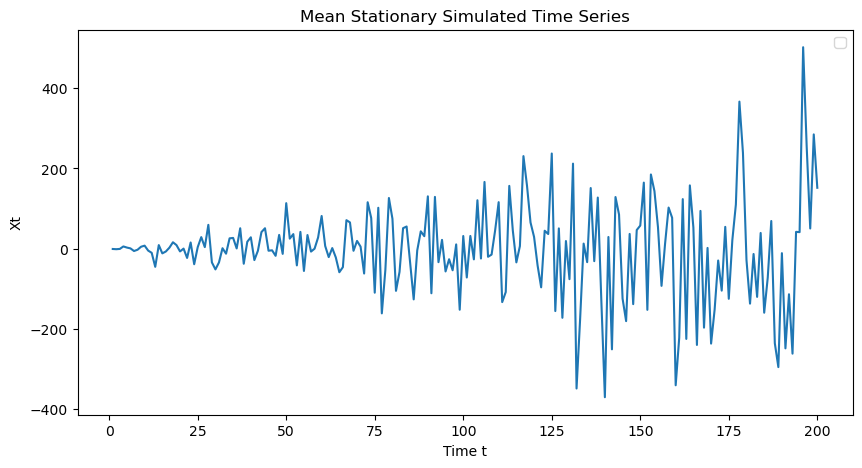

In [13]:
def simulate_time_series(n, sigma=1):
    t = np.arange(1, n + 1)  # Time index starting from 1
    epsilon_t = np.random.normal(0, sigma, n)  # White noise
    X_t = t * epsilon_t  # Generate the time series
    
    return t, X_t

# Simulation parameters
n = 200  # Number of time steps
sigma = 1  # Standard deviation of white noise

# Simulate the time series
t, X_t = simulate_time_series(n, sigma)

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(t, X_t)
plt.xlabel('Time t')
plt.ylabel('Xt')
plt.title('Mean Stationary Simulated Time Series')
plt.legend()
plt.savefig("mean_stationary.png", transparent=True)
plt.show()

<h2>Mean Stationary, not Variance Stationary</h2>
<p style="text-align: center;">$X_t = \varepsilon_t + t$</p>

/var/folders/pk/sxdc5n5x6mb322grbvxz_nm40000gp/T/ipykernel_21890/2414578774.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


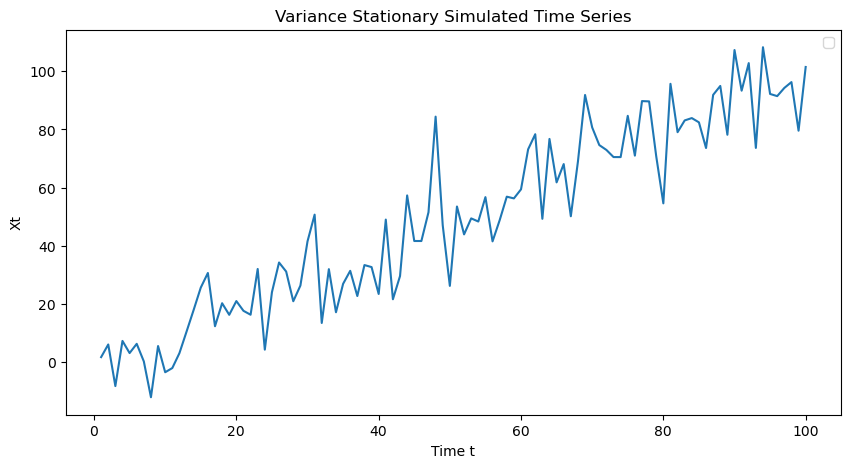

In [15]:
def simulate_variance_stationary_time_series(n, sigma=1):
    t = np.arange(1, n + 1)  # Time index starting from 1
    epsilon_t = np.random.normal(0, sigma, n)  # White noise
    X_t = epsilon_t + t  # Generate the time series
    
    return t, X_t

# Simulation parameters
n = 100  # Number of time steps
sigma = 10  # Standard deviation of white noise

# Simulate the time series
t, X_t = simulate_variance_stationary_time_series(n, sigma)

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(t, X_t)
plt.xlabel('Time t')
plt.ylabel('Xt')
plt.title('Variance Stationary Simulated Time Series')
plt.legend()
plt.savefig("variance_stationary.png", transparent=True, bbox_inches="tight")
plt.show()